In [53]:
import pandas as pd

data = pd.read_pickle('../producer/data/cleaned_laps_df.pkl')

data.head()

,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,TyreLife_LapNumber_Interaction,TrackStatus_1,TrackStatus_12,TrackStatus_124,...,Team_Alpine,Team_Aston Martin,Team_Ferrari,Team_Haas F1 Team,Team_McLaren,Team_Mercedes,Team_Red Bull Racing,Team_Williams,LapStartHour,LapTimeSeconds
0,1.0,232.0,231.0,278.0,252.0,False,4.0,False,True,False,...,False,False,False,False,False,False,True,False,15,99.019
1,1.0,227.0,238.0,278.0,288.0,True,10.0,False,True,False,...,False,False,False,False,False,False,True,False,15,97.974
3,1.0,228.0,238.0,278.0,289.0,False,28.0,True,False,False,...,False,False,False,False,False,False,True,False,15,97.976
5,1.0,229.0,239.0,279.0,291.0,False,54.0,True,False,False,...,False,False,False,False,False,False,True,False,15,97.986
6,1.0,230.0,239.0,279.0,293.0,False,70.0,True,False,False,...,False,False,False,False,False,False,True,False,15,98.021


In [54]:
print(data.dtypes)

Stint                   float64
SpeedI1                 float64
SpeedI2                 float64
SpeedFL                 float64
SpeedST                 float64
                         ...   
Team_Mercedes              bool
Team_Red Bull Racing       bool
Team_Williams              bool
LapStartHour              int32
LapTimeSeconds          float64
Length: 97, dtype: object


In [55]:
# Drop any irrelevant columns
X = data.drop(columns=['LapTimeSeconds'])
y = data['LapTimeSeconds']

In [56]:
y

0        99.019
1        97.974
3        97.976
5        97.986
6        98.021
          ...  
24426    90.445
24427    90.207
24428    90.252
24429    90.429
24430    91.256
Name: LapTimeSeconds, Length: 17927, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
import joblib
joblib.dump(scaler, '../producer/data/scaler.pkl')

['../producer/data/scaler.pkl']

,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,TyreLife_LapNumber_Interaction,TrackStatus_1,TrackStatus_12,TrackStatus_124,...,Team_AlphaTauri,Team_Alpine,Team_Aston Martin,Team_Ferrari,Team_Haas F1 Team,Team_McLaren,Team_Mercedes,Team_Red Bull Racing,Team_Williams,LapStartHour
3,1.0,228.0,238.0,278.0,289.0,False,28.0,True,False,False,...,False,False,False,False,False,False,False,True,False,15


In [76]:
scaler = joblib.load('../producer/data/scaler.pkl')
scaler.transform(pd.DataFrame([X.iloc[2]]))

array([[-1.17900363, -0.55259021, -0.12930889,  0.3164228 , -0.30539758,
        -0.51443022, -0.85079681,  0.31251483, -0.1852864 , -0.09339139,
        -0.05154401, -0.03445024, -0.04007954, -0.03125981, -0.00835075,
        -0.08122734, -0.00835075, -0.01181015, -0.01446493, -0.02770596,
        -0.02893894, -0.12795065, -0.09224501, -0.02209863, -0.02362525,
        -0.02045864, -0.07583373, -0.01867545, -0.55175972,  2.09458893,
        -1.1775342 , -0.9417928 ,  1.09446535, -0.28466511, -0.99090669,
        -0.17998632, -0.71752423,  2.57610466, -0.04874894, -0.22413837,
        -0.1998912 , -0.25630201, -0.2210326 ,  5.12993085, -0.17832793,
        -0.21310745, -0.24370633, -0.21964081, -0.20251755, -0.20363437,
        -0.1924153 , -0.20695442, -0.23819873, -0.23041592, -0.28538014,
        -0.20177011, -0.19780698, -0.20805124, -0.22720972, -0.20713756,
        -0.22618967,  1.8352822 , -1.8352822 , -0.22327917, -0.23275576,
        -0.23058368, -0.15489168, -0.22550758, -0.2

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/Users/bolt/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_test_scaled, y_test), batch_size=32)


Epoch 1/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - loss: 2429.6230 - mae: 32.8072 - val_loss: 23.5231 - val_mae: 3.0471
Epoch 2/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 22.9130 - mae: 3.0196 - val_loss: 16.6891 - val_mae: 2.4711
Epoch 3/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 15.4756 - mae: 2.4244 - val_loss: 15.2234 - val_mae: 2.4159
Epoch 4/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 13.0220 - mae: 2.2258 - val_loss: 15.0389 - val_mae: 2.4726
Epoch 5/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 13.3006 - mae: 2.2229 - val_loss: 15.3256 - val_mae: 2.3589
Epoch 6/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 11.8948 - mae: 2.1369 - val_loss: 15.5330 - val_mae: 2.3263
Epoch 7/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 12.7904 - mae: 2.1810 - val_loss: 14.4201 - val_mae: 2.3401
Epoch 8/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 10.6218 - mae: 1.9974 - val_loss: 16.6372 - val_mae: 2.6804
Epoch 9/200
4

In [60]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 11.8355 - mae: 1.4586
Test Loss: 9.778168678283691, Test MAE: 1.4247585535049438


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


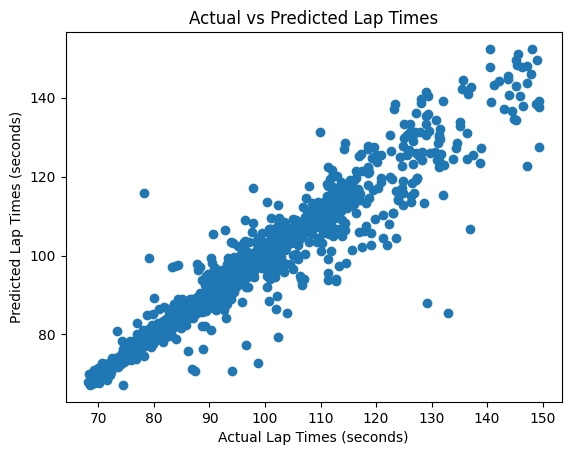

In [61]:
y_pred = model.predict(X_test_scaled)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Lap Times (seconds)')
plt.ylabel('Predicted Lap Times (seconds)')
plt.title('Actual vs Predicted Lap Times')
plt.show()


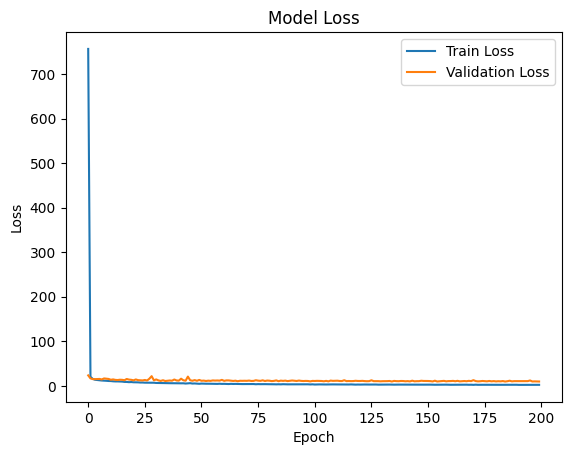

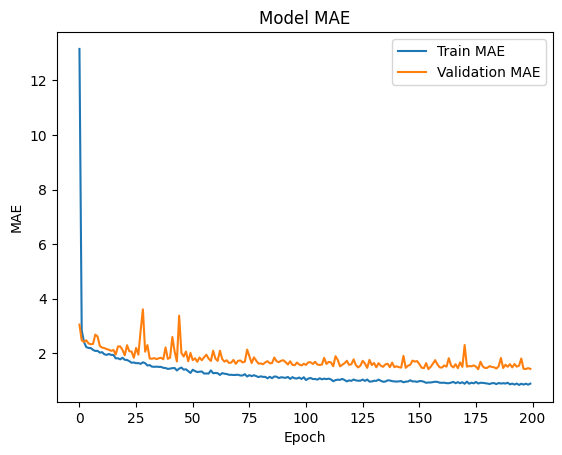

In [62]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [63]:
model.save('../consumer/models/lap_time_prediction_model.keras')

Stint                     1.0
SpeedI1                 228.0
SpeedI2                 238.0
SpeedFL                 278.0
SpeedST                 289.0
                        ...  
Team_McLaren            False
Team_Mercedes           False
Team_Red Bull Racing     True
Team_Williams           False
LapStartHour               15
Name: 3, Length: 96, dtype: object

In [79]:
model.predict(pd.DataFrame([X.iloc[2]]))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


3701.8699